<a href="https://colab.research.google.com/github/Matheshmj/Fake_review_classification_and_topic_modelling/blob/main/ML_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/fake reviews dataset (1).csv")
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df.isna().sum()

,0
category,0
rating,0
label,0
text_,0


In [ ]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df.dtypes

,0
category,object
rating,float64
label,object
text_,object


In [ ]:
df.rename(columns={'text_':'text'},inplace=True)
df

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [ ]:
df.nunique()

,0
category,10
rating,5
label,2
text,40412


In [ ]:
df['category'].unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

In [ ]:
df['label'].unique()

array(['CG', 'OR'], dtype=object)

# **EDA**

In [ ]:
# calculate the class distribution of target column

label_count = df['label'].value_counts()
label_count

,count
label,
CG,20216
OR,20216


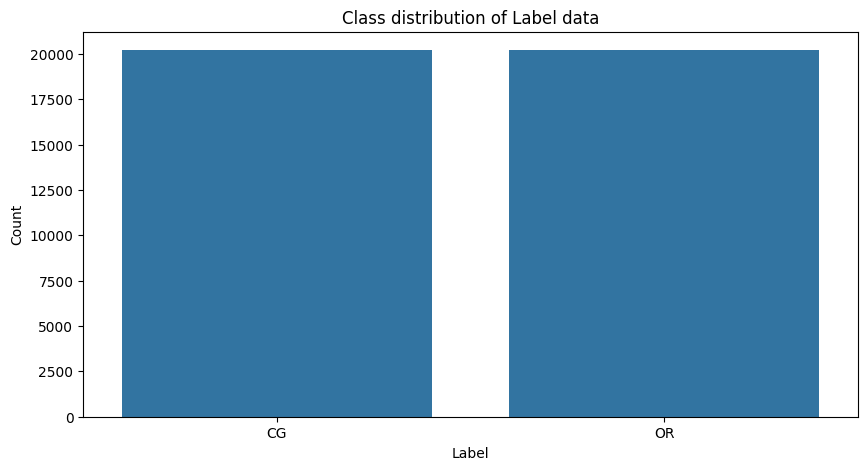

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = label_count.index , y = label_count.values)
plt.title("Class distribution of Label data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [ ]:
#distribution of rating
rating_count = df['rating'].value_counts()
rating_count

,count
rating,
5.0,24559
4.0,7965
3.0,3786
1.0,2155
2.0,1967


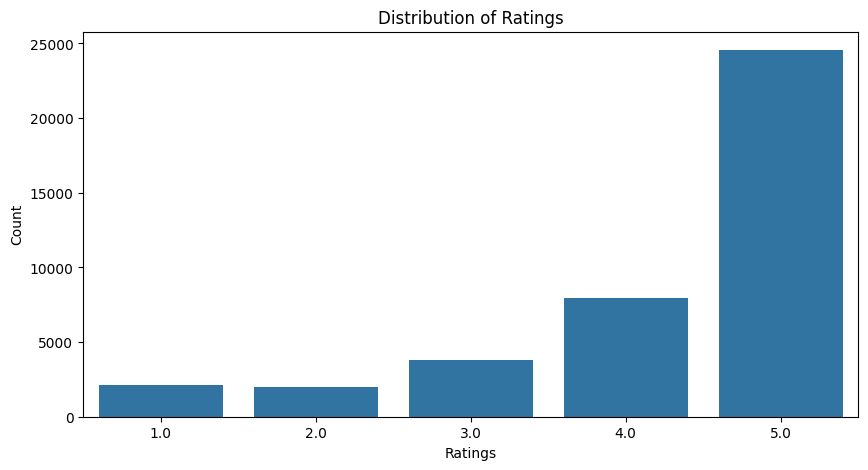

In [ ]:
plt.figure(figsize =(10,5))
sns.barplot(x = rating_count.index , y = rating_count.values)
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

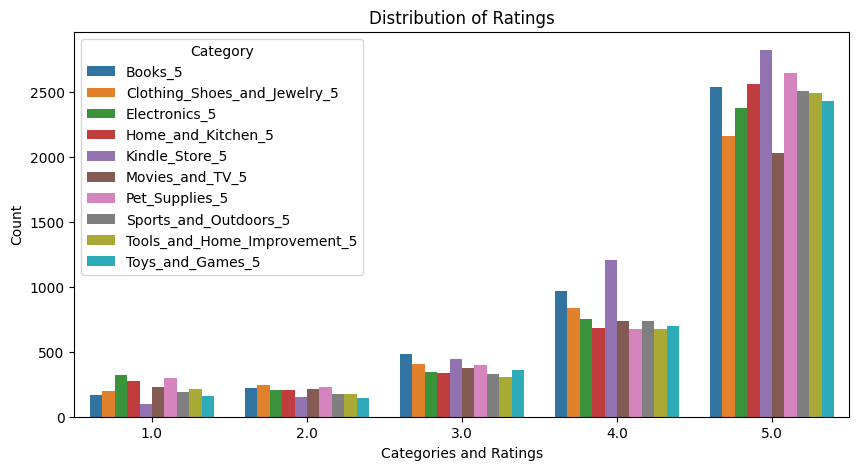

In [ ]:
# Group by ratings and category
grouped_data = df.groupby(['rating', 'category']).size().reset_index(name='count')

plt.figure(figsize=(10, 5))
sns.barplot(data=grouped_data, x='rating', y='count', hue='category')
plt.title("Distribution of Ratings")
plt.xlabel("Categories and Ratings")
plt.ylabel("Count")
plt.legend(title="Category")
plt.show()

In [ ]:
from wordcloud import WordCloud

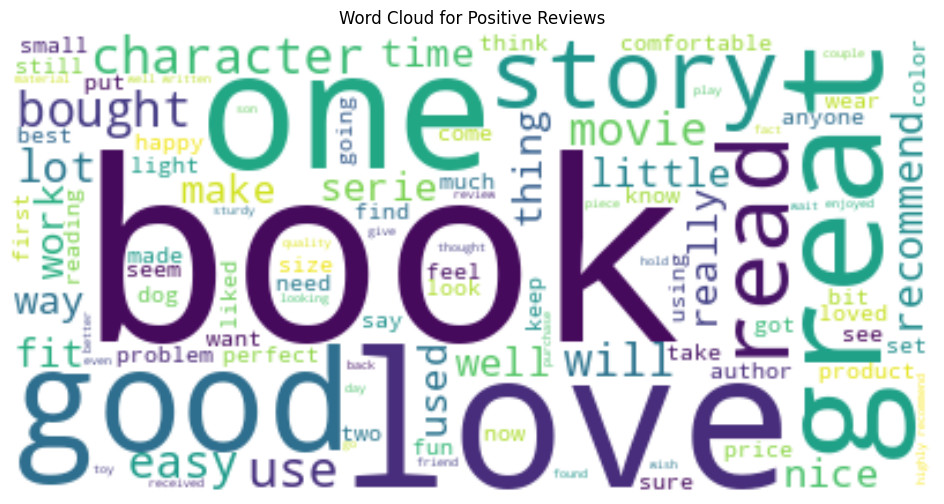

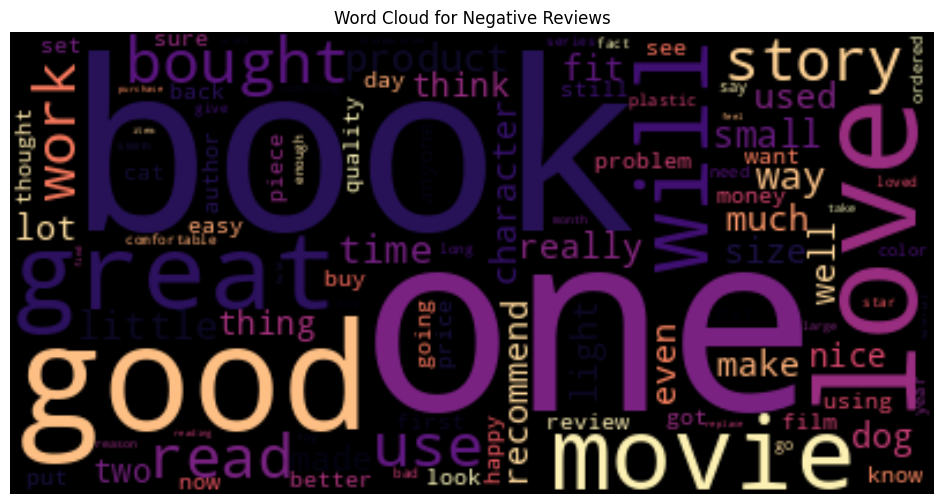

In [ ]:
# 6. Word Cloud for Reviews
positive_reviews = " ".join(df[df['rating'] >= 4]['text'].dropna())
negative_reviews = " ".join(df[df['rating'] <= 2]['text'].dropna())

plt.figure(figsize=(12, 6))
wc = WordCloud(background_color='white', colormap='viridis', max_words=100).generate(positive_reviews)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

plt.figure(figsize=(12, 6))
wc = WordCloud(background_color='black', colormap='magma', max_words=100).generate(negative_reviews)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

<ipython-input-20-cb545fbcbda4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Sentiment', data=df, palette='coolwarm', order=['Positive', 'Neutral', 'Negative'], legend=False)


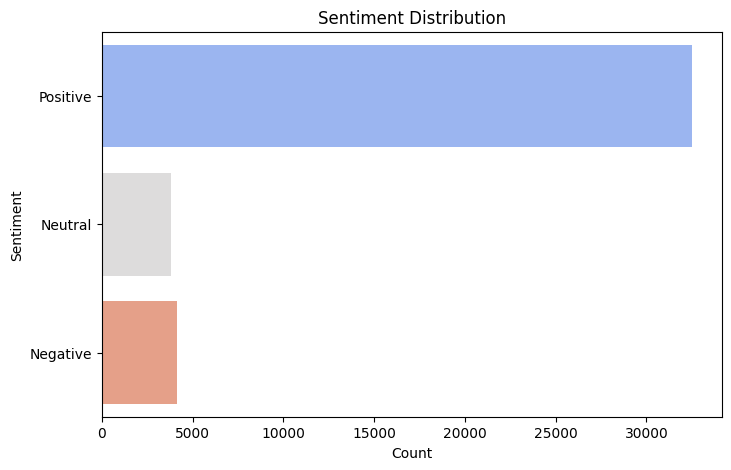

In [ ]:
def sentiment_label(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['rating'].apply(sentiment_label)

plt.figure(figsize=(8, 5))
sns.countplot(y='Sentiment', data=df, palette='coolwarm', order=['Positive', 'Neutral', 'Negative'], legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.show()

# **Data Preprocessing**

### **Data Cleaning**

In [ ]:
df['text'] = df['text'].str.lower()

In [ ]:
import re
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [ ]:
df['text'] = df['text'].str.strip()

In [ ]:
df

,category,rating,label,text,Sentiment
0,Home_and_Kitchen_5,5.0,CG,love this well made sturdy and very comfortab...,Positive
1,Home_and_Kitchen_5,5.0,CG,love it a great upgrade from the original ive...,Positive
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back i love the look and ...,Positive
3,Home_and_Kitchen_5,1.0,CG,missing information on how to use it but it is...,Negative
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we have had the set...,Positive
...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,i had read some reviews saying that this bra r...,Positive
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,i wasnt sure exactly what it would be it is a ...,Positive
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,you can wear the hood by itself wear it with t...,Negative
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,i liked nothing about this dress the only reas...,Negative


### **Tokenization**

In [ ]:
import nltk

# Download the 'punkt_tab' package
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
df['tokens'] = df['text'].apply(word_tokenize)
df

,category,rating,label,text,Sentiment,tokens
0,Home_and_Kitchen_5,5.0,CG,love this well made sturdy and very comfortab...,Positive,"[love, this, well, made, sturdy, and, very, co..."
1,Home_and_Kitchen_5,5.0,CG,love it a great upgrade from the original ive...,Positive,"[love, it, a, great, upgrade, from, the, origi..."
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back i love the look and ...,Positive,"[this, pillow, saved, my, back, i, love, the, ..."
3,Home_and_Kitchen_5,1.0,CG,missing information on how to use it but it is...,Negative,"[missing, information, on, how, to, use, it, b..."
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we have had the set...,Positive,"[very, nice, set, good, quality, we, have, had..."
...,...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,i had read some reviews saying that this bra r...,Positive,"[i, had, read, some, reviews, saying, that, th..."
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,i wasnt sure exactly what it would be it is a ...,Positive,"[i, wasnt, sure, exactly, what, it, would, be,..."
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,you can wear the hood by itself wear it with t...,Negative,"[you, can, wear, the, hood, by, itself, wear, ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,i liked nothing about this dress the only reas...,Negative,"[i, liked, nothing, about, this, dress, the, o..."


### **Stop-word Removal**

In [ ]:
import nltk

# Download the 'stopwords' dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words] )

In [ ]:
df

,category,rating,label,text,Sentiment,tokens
0,Home_and_Kitchen_5,5.0,CG,love this well made sturdy and very comfortab...,Positive,"[love, well, made, sturdy, comfortable, love, ..."
1,Home_and_Kitchen_5,5.0,CG,love it a great upgrade from the original ive...,Positive,"[love, great, upgrade, original, ive, mine, co..."
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back i love the look and ...,Positive,"[pillow, saved, back, love, look, feel, pillow]"
3,Home_and_Kitchen_5,1.0,CG,missing information on how to use it but it is...,Negative,"[missing, information, use, great, product, pr..."
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we have had the set...,Positive,"[nice, set, good, quality, set, two, months]"
...,...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,i had read some reviews saying that this bra r...,Positive,"[read, reviews, saying, bra, ran, small, order..."
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,i wasnt sure exactly what it would be it is a ...,Positive,"[wasnt, sure, exactly, would, little, large, s..."
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,you can wear the hood by itself wear it with t...,Negative,"[wear, hood, wear, hood, wear, jacket, without..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,i liked nothing about this dress the only reas...,Negative,"[liked, nothing, dress, reason, gave, stars, o..."


### **Stemming or Lematization**

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head()

,category,rating,label,text,Sentiment,tokens
0,Home_and_Kitchen_5,5.0,CG,love this well made sturdy and very comfortab...,Positive,"[love, well, made, sturdy, comfortable, love, ..."
1,Home_and_Kitchen_5,5.0,CG,love it a great upgrade from the original ive...,Positive,"[love, great, upgrade, original, ive, mine, co..."
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back i love the look and ...,Positive,"[pillow, saved, back, love, look, feel, pillow]"
3,Home_and_Kitchen_5,1.0,CG,missing information on how to use it but it is...,Negative,"[missing, information, use, great, product, pr..."
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we have had the set...,Positive,"[nice, set, good, quality, set, two, month]"


In [ ]:
# Join tokens into a single string
df['joined_text'] = df['tokens'].apply(lambda x: ' '.join(x))
df

,category,rating,label,text,Sentiment,tokens,joined_text
0,Home_and_Kitchen_5,5.0,CG,love this well made sturdy and very comfortab...,Positive,"[love, well, made, sturdy, comfortable, love, ...",love well made sturdy comfortable love itvery ...
1,Home_and_Kitchen_5,5.0,CG,love it a great upgrade from the original ive...,Positive,"[love, great, upgrade, original, ive, mine, co...",love great upgrade original ive mine couple year
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back i love the look and ...,Positive,"[pillow, saved, back, love, look, feel, pillow]",pillow saved back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,missing information on how to use it but it is...,Negative,"[missing, information, use, great, product, pr...",missing information use great product price
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we have had the set...,Positive,"[nice, set, good, quality, set, two, month]",nice set good quality set two month
...,...,...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,i had read some reviews saying that this bra r...,Positive,"[read, review, saying, bra, ran, small, ordere...",read review saying bra ran small ordered two b...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,i wasnt sure exactly what it would be it is a ...,Positive,"[wasnt, sure, exactly, would, little, large, s...",wasnt sure exactly would little large small si...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,you can wear the hood by itself wear it with t...,Negative,"[wear, hood, wear, hood, wear, jacket, without...",wear hood wear hood wear jacket without hood s...
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,i liked nothing about this dress the only reas...,Negative,"[liked, nothing, dress, reason, gave, star, or...",liked nothing dress reason gave star ordered s...


In [ ]:
df.to_csv("Downloads\cleaned_review_data.csv")

### **Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  # Limit features to top 5000 words
X = tfidf.fit_transform(df['joined_text'])
y = df['label']

### **Split the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **MODEL**

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report , accuracy_score

#predict the model
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8704092988747373
Classification Report:
               precision    recall  f1-score   support

          CG       0.88      0.85      0.87      4016
          OR       0.86      0.89      0.87      4071

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



### **Confusion matrix**

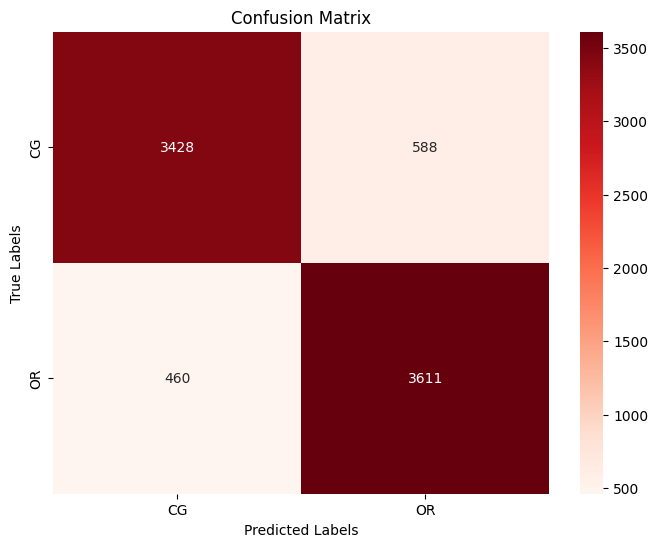

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### **Decision Tree model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt_y_pred = dt_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Classification Report:\n", classification_report(y_test, dt_y_pred))

Accuracy: 0.7461357734635835
Classification Report:
               precision    recall  f1-score   support

          CG       0.74      0.75      0.75      4016
          OR       0.75      0.74      0.75      4071

    accuracy                           0.75      8087
   macro avg       0.75      0.75      0.75      8087
weighted avg       0.75      0.75      0.75      8087



### **Confusion Matrix**

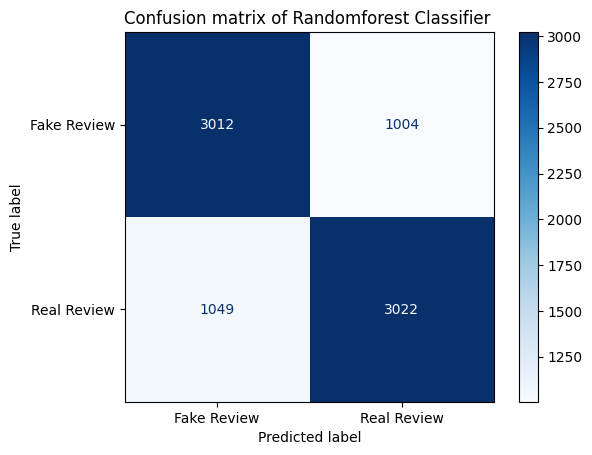

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

#Generate the confusion matrix
cm = confusion_matrix(y_test,dt_y_pred)

#Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm ,display_labels = ['Fake Review' , 'Real Review'])
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion matrix of Randomforest Classifier ")
plt.show()

### **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_y_pred = rf_model.predict(X_test)
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Classification Report:\n", classification_report(y_test, rf_y_pred))

Accuracy: 0.8459255595400025
Classification Report:
               precision    recall  f1-score   support

          CG       0.82      0.88      0.85      4016
          OR       0.87      0.82      0.84      4071

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087



### **Confusion matrix**

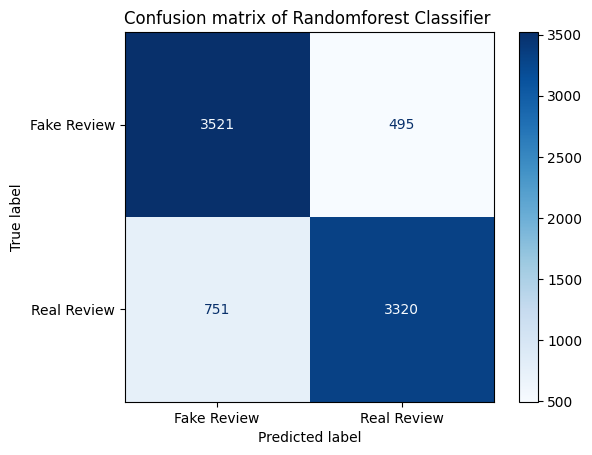

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

#Generate the confusion matrix
cm = confusion_matrix(y_test,rf_y_pred)

#Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm ,display_labels = ['Fake Review' , 'Real Review'])
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion matrix of Randomforest Classifier ")
plt.show()

### **SVM**

In [ ]:
from sklearn.svm import SVC

#Train SVM model
svm_model = SVC(kernel = 'linear',C = 1)
svm_model.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [ ]:
svm_model_pred = svm_model.predict(X_test)
#Print evaluation metrics
from sklearn.metrics import classification_report , accuracy_score

print("Accuracy:", accuracy_score(y_test,svm_model_pred))
print("Classification Report:\n", classification_report(y_test,svm_model_pred))

Accuracy: 0.8726350933597131
Classification Report:
               precision    recall  f1-score   support

          CG       0.87      0.87      0.87      4016
          OR       0.87      0.88      0.87      4071

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



### **Confusion matrix**

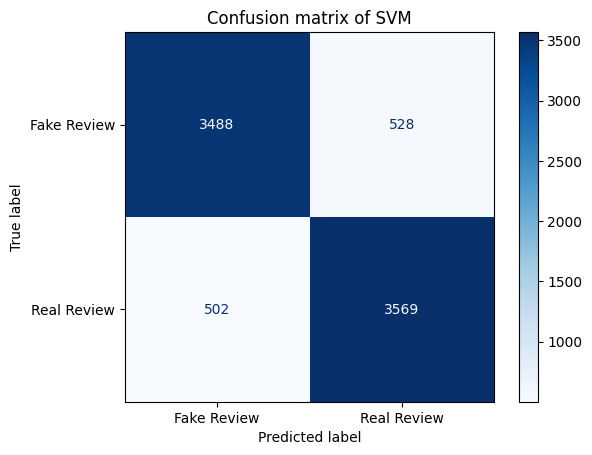

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

#Generate the confusion matrix
cm = confusion_matrix(y_test,svm_model_pred)

#Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm ,display_labels = ['Fake Review' , 'Real Review'])
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion matrix of SVM")
plt.show()

### **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred_nb = nb.predict(X_test)
#Print evaluation metrics

print("Accuracy:", accuracy_score(y_test,y_pred_nb))
print("Classification Report:\n", classification_report(y_test,y_pred_nb))

Accuracy: 0.8472857672808211
Classification Report:
               precision    recall  f1-score   support

          CG       0.83      0.87      0.85      4016
          OR       0.86      0.83      0.85      4071

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087



### **Confusion matrix**

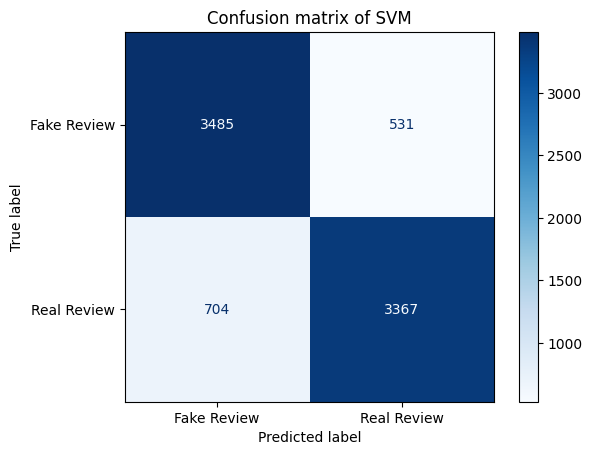

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

#Generate the confusion matrix
cm = confusion_matrix(y_test,y_pred_nb)

#Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm ,display_labels = ['Fake Review' , 'Real Review'])
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion matrix of SVM")
plt.show()

# **Comparision**

In [ ]:
print("Performance of various ML models :")
print('\n')
print("Logistic Regression Prediction Accuracy :" , str(np.round(accuracy_score(y_test,y_pred)*100,2))+'%')
print("Decision tree Prediction Accuracy :" , str(np.round(accuracy_score(y_test,dt_y_pred)*100,2))+'%')
print("Random Forest Prediction Accuracy :" , str(np.round(accuracy_score(y_test,rf_y_pred)*100,2))+'%')
print("SVM Prediction Accuracy :" , str(np.round(accuracy_score(y_test,svm_model_pred)*100,2))+'%')
print("Naive Bayes Prediction Accuracy :" , str(np.round(accuracy_score(y_test,y_pred_nb)*100,2))+'%')

Performance of various ML models :


Logistic Regression Prediction Accuracy : 87.04%
Decision tree Prediction Accuracy : 74.61%
Random Forest Prediction Accuracy : 84.59%
SVM Prediction Accuracy : 87.26%
Naive Bayes Prediction Accuracy : 84.73%
